# Recommendation System for LearnLink: A Language Learning Platform for Children aged 11-22 with Disabilities
- [Project Presentatation Deck]()

#### Author: Lillian Lakes
- [GitHub Profile](https://github.com/lillianlakes) 
- [LinkedIn Profile](https://www.linkedin.com/in/lillianlakes/) 

## Preliminary Steps

In [1]:
# Import required libraries

# System and background processes
import time
import os
import asyncio
from concurrent.futures import ProcessPoolExecutor

# Data creation, processing and computation
import pandas as pd
import numpy as np
import random
from faker import Faker
from scipy import stats
import datetime as dt

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## Create Synthetic Data

## Create the Synthetic Users and Settings Data

In [2]:
# Set random seeds for reproducibility
random.seed(0)
np.random.seed(0)

# Create a Faker instance for generating fake data
fake = Faker()
fake.seed_instance(0)

# Define languages list
# Languages are based on English (for English as a Second Language Students)
# and the top seven foreign languages taught as part of K-12 education
languages = ['Spanish', 'French', 'German', 'Latin', 'Japanese', 'Chinese', 'Russian', 'English']

# Define test score range
score_min, score_max = 0, 100

# Define WCAG-based accessibility settings for different disability types, with appropriate average 
# test scores and score standard deviations
disability_settings = [
    # Accessibility settings for disability_id 90000001
     {
      'disability_id': 90000001,
      'accessibility_types': [
          # WCAG-based accessibility settings with high score averages and low standard deviations
         {
          'setting_type': '90000001A',
          'font_color' : 'charcoal',
          'background_color' : 'pastel light blue',
          'font_size' : 15,
          'font_weight' : 'regular',
          'font_family' : 'Trebuchet',
          'letter_spacing' : 5.25,	
          'line_spacing' : 22.5,
          'word_spacing' : 78.75,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : 'default',
          'lists with bullets': 'default',
          'wcag_compliant': True,
          'score_avg': 80,
          'score_std': 20
         },
         {
          'setting_type': '90000001B',
          'font_color' : 'licorice',
          'background_color' : 'pastel light yellow',
          'font_size' : 14,
          'font_weight' : 'regular',
          'font_family' : 'Tahoma',
          'letter_spacing' : 4.9,	
          'line_spacing' : 21,
          'word_spacing' : 73.5,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : 'default',
          'lists with bullets': 'default',
          'wcag_compliant': True,
          'score_avg': 75,
          'score_std': 25
         },
         {
          'setting_type': '90000001C',
          'font_color' : 'onyx',
          'background_color' : 'light cream',
          'font_size' : 12,
          'font_weight' : 'regular',
          'font_family' : 'Century Gothic',
          'letter_spacing' : 4.2,	
          'line_spacing' : 18,
          'word_spacing' : 63,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : 'default',
          'lists with bullets': 'default',
          'wcag_compliant': True,
          'score_avg': 90,
          'score_std': 20
         },
         {
          'setting_type': '90000001D',
          'font_color' : 'matte black',
          'background_color' : 'light gray',
          'font_size' : 13,
          'font_weight' : 'regular',
          'font_family' : 'Open Sans',
          'letter_spacing' : 4.55,	
          'line_spacing' : 19.5,
          'word_spacing' : 68.25,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : 'default',
          'lists with bullets': 'default',
          'wcag_compliant': True,
          'score_avg': 85,
          'score_std': 20
         },
         # Non-WCAG-based accessibility setting with a low score average and higher standard deviation
         {
          'setting_type': '90000001E',
          'font_color' : 'white',
          'background_color' : 'red',
          'font_size' : 8,
          'font_weight' : 'regular',
          'font_family' : 'Open Sans',
          'letter_spacing' : 2.55,	
          'line_spacing' : 7.5,
          'word_spacing' : 30.25,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : 'default',
          'lists with bullets': 'default',
          'wcag_compliant': False,
          'score_avg': 55,
          'score_std': 45
         }
      ]
   },
   # Accessibility settings for disability_id 90000002
    {
      'disability_id': 90000002,
      'accessibility_types': [
          # WCAG-based accessibility settings with high score averages and low standard deviations
         {
          'setting_type': '90000002A',
          'font_color' : 'dark gray',
          'background_color' : 'eggshell',
          'font_size' : 16,
          'font_weight' : 'regular',
          'font_family' : 'Open Sans',
          'letter_spacing' : 1.92,	
          'line_spacing' : 28,
          'word_spacing' : 2.56,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : 'default',
          'bionic_reading' : True,
          'lists with bullets': True,
          'wcag_compliant': True,
          'score_avg': 85,
          'score_std': 20
         },
         {
          'setting_type': '90000002B',
          'font_color' : 'midnight blue',
          'background_color' : 'ivory',
          'font_size' : 12,
          'font_weight' : 'regular',
          'font_family' : 'Lexend',
          'letter_spacing' : 1.44,	
          'line_spacing' : 21,
          'word_spacing' : 1.92,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : 'default',
          'bionic_reading' : True,
          'lists with bullets': True,
          'wcag_compliant': True,
          'score_avg': 90,
          'score_std': 20
         },
         {
          'setting_type': '90000002C',
          'font_color' : 'charcoal',
          'background_color' : 'light gray',
          'font_size' : 14,
          'font_weight' : 'regular',
          'font_family' : 'Helvetica',
          'letter_spacing' : 1.68,	
          'line_spacing' : 24.5,
          'word_spacing' : 2.24,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : 'default',
          'bionic_reading' : True,
          'lists with bullets': True,
          'wcag_compliant': True,
          'score_avg': 85,
          'score_std': 20
         },
         # Non-WCAG-based accessibility setting with a low score average and higher standard deviation
         {
          'setting_type': '90000002D',
          'font_color' : 'yellow',
          'background_color' : 'orange',
          'font_size' : 9,
          'font_weight' : 'regular',
          'font_family' : 'Helvetica',
          'letter_spacing' : 1.18,	
          'line_spacing' : 12.5,
          'word_spacing' : 1.24,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : 'default',
          'bionic_reading' : False,
          'lists with bullets': False,
          'wcag_compliant': False,
          'score_avg': 50,
          'score_std': 55
         }
      ]
   },
   # Accessibility settings for disability_id 90000003
    {
      'disability_id': 90000003,
      'accessibility_types': [
          # WCAG-based accessibility settings with high score averages and low standard deviations
         {
          'setting_type': '90000003A',
          'font_color' : 'nightrider',
          'background_color' : 'quartz',
          'font_size' : 15,
          'font_weight' : 'bold',
          'font_family' : 'Poppins',
          'letter_spacing' : 1.8,	
          'line_spacing' : 22.5,
          'word_spacing' : 2.4,
          'text_alignment' : 'default',	
          'is_auto_play_tts' : 'default',
          'bionic_reading' : 'default',
          'lists with bullets': 'default',
          'wcag_compliant': True,
          'score_avg': 90,
          'score_std': 25
         },
         {
          'setting_type': '90000003B',
          'font_color' : 'black russian',
          'background_color' : 'prim',
          'font_size' : 18,
          'font_weight' : 'regular',
          'font_family' : 'Source Sans Pro',
          'letter_spacing' : 2.16,	
          'line_spacing' : 27,
          'word_spacing' : 2.88,
          'text_alignment' : 'default',	
          'is_auto_play_tts' : 'default',
          'bionic_reading' : 'default',
          'lists with bullets': 'default',
          'wcag_compliant': True,
          'score_avg': 85,
          'score_std': 20
         },
         {
          'setting_type': '90000003C',
          'font_color' : 'charcoal',
          'background_color' : 'linen',
          'font_size' : 24,
          'font_weight' : 'regular',
          'font_family' : 'Century Gothic',
          'letter_spacing' : 2.88,	
          'line_spacing' : 36,
          'word_spacing' : 3.84,
          'text_alignment' : 'default',	
          'is_auto_play_tts' : 'default',
          'bionic_reading' : 'default',
          'lists with bullets': 'default',
          'wcag_compliant': True,
          'score_avg': 80,
          'score_std': 25
         },
         # Non-WCAG-based accessibility setting with a low score average and higher standard deviation
         {
          'setting_type': '90000003D',
          'font_color' : 'green',
          'background_color' : 'yellow',
          'font_size' : 10,
          'font_weight' : 'regular',
          'font_family' : 'Century Gothic',
          'letter_spacing' : 1.88,	
          'line_spacing' : 15,
          'word_spacing' : 1.84,
          'text_alignment' : 'default',	
          'is_auto_play_tts' : 'default',
          'bionic_reading' : 'default',
          'lists with bullets': 'default',
          'wcag_compliant': False,
          'score_avg': 55,
          'score_std': 45
         }
      ]
   },
]

# Create array of disability IDs
disability_ids = [setting['disability_id'] for setting in disability_settings]

# Load the profile images from 'data/Child_Images.csv'
profile_photos = pd.read_csv('data/Child_Images.csv')


# Function to generate a random profile photo
def get_random_profile_photo():
    """
    Get a random profile photo URL from 'data/Child_Images.csv'.

    Returns:
    - str: URL for the profile photo
    """
    return profile_photos.sample()['image_url'].values[0]


# Function to generate user data
def generate_user_data(x):
    """
    Generate user data based on the specified number (x) of users.

    Parameters:
    - x (int): Number of users to generate

    Returns:
    - DataFrame: Dataframe containing user data
    """

    users_data = [
        {
            'id': 10000001 + i,
            'first_name': fake.first_name(),
            'last_name': (last_name := fake.last_name()),
            'username': f"{fake.first_name().lower()}.{last_name.lower()}@{fake.domain_name()}",
            'date_of_birth': fake.date_of_birth(None, 11, 22),
            'native_language': languages[i % (len(languages) + 6)] if i % (len(languages) + 6) >= 0 and 
              i % (len(languages) + 6) < (len(languages) - 1) else languages[-1],
            'learning_language': languages[-1] if i % (len(languages) + 6) >= 0 and i % (len(languages) + 6) 
              < (len(languages) - 1) else languages[i % (len(languages) + 6) - (len(languages) - 1)],
            'disability_id': disability_ids[i % len(disability_ids)],
            'created_at': fake.date_time_between('-1d'),
            'profile_photo': get_random_profile_photo()
        }
        for i in range(x)
    ]
    return pd.DataFrame(users_data)

# Function to generate accessibility settings data
def generate_settings_data(x):
    """
    Generate accessibility settings data based on the specified number (x) of settings.

    Parameters:
    - x (int): Number of settings to generate

    Returns:
    - DataFrame: Dataframe containing accessibility settings data
    """
    settings_data = []
    for i in range(x):
        dis_set_i = i % len(disability_settings)
        acc_i = random.randint(0, len(disability_settings[dis_set_i]['accessibility_types']) - 1)

        setting = {'id': 40000001 + i}
        
        disability_setting = disability_settings[dis_set_i]['accessibility_types'][acc_i]
        setting.update({
            'setting_type': disability_setting['setting_type'],
            'font_color': disability_setting['font_color'],
            'background_color': disability_setting['background_color'],
            'font_size': disability_setting['font_size'],
            'font_weight': disability_setting['font_weight'],
            'font_family': disability_setting['font_family'],
            'letter_spacing': disability_setting['letter_spacing'],
            'line_spacing': disability_setting['line_spacing'],
            'word_spacing': disability_setting['word_spacing'],
            'text_alignment': disability_setting['text_alignment'],
            'is_auto_play_tts': disability_setting['is_auto_play_tts'],
            'bionic_reading': disability_setting['bionic_reading'],
            'lists with bullets': disability_setting['lists with bullets'],
            'wcag_compliant': disability_setting['wcag_compliant'],
            'score': round(stats.truncnorm.rvs((score_min - disability_setting['score_avg']) / disability_setting['score_std'],
                                               (score_max - disability_setting['score_avg']) / disability_setting['score_std'],
                                               loc=disability_setting['score_avg'],
                                               scale=disability_setting['score_std']), 1)
        })

        settings_data.append(setting)

    return pd.DataFrame(settings_data)

# Function to generate user-settings relationship data   
def generate_user_settings_data(users_df, settings_df):
    """
    Generate user-settings relationship data based on user and settings dataframes.

    Parameters:
    - users_df (dataframe): Dataframe containing user data
    - settings_df (dataframe): Dataframe containing accessibility settings data

    Returns:
    - Dataframe: Dataframe containing user-settings relationship data
    """
    user_settings_data = [
        {'id': 70000001 + i, 'user_id': user.id, 'setting_id': setting.id}
        for i, (user, setting) in enumerate(zip(users_df.itertuples(), settings_df.itertuples()))
    ]
    return pd.DataFrame(user_settings_data)

# Generate Dataframes
users = generate_user_data(1500)
settings = generate_settings_data(1500)
user_settings = generate_user_settings_data(users, settings)

# Convert Data Types
users['id'] = users['id'].astype('int64')
users['date_of_birth'] = pd.to_datetime(users['date_of_birth'])
settings['id'] = settings['id'].astype('int64')
settings['font_size'] = settings['font_size'].astype('int64')
settings['is_auto_play_tts'] = settings['is_auto_play_tts'].astype('bool')
user_settings['id'] = user_settings['id'].astype('int64')
user_settings['user_id'] = user_settings['user_id'].astype('int64')
user_settings['setting_id'] = user_settings['setting_id'].astype('int64')


### Export DataFrames as CSV Files

In [3]:
users.to_csv('data/Users_Table.csv')
settings.to_csv('data/Settings_Table.csv')
user_settings.to_csv('data/User_Settings_Table.csv')

## Preliminary Exploratory Data Analysis (EDA)

### Explore the Users data

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1500 non-null   int64         
 1   first_name         1500 non-null   object        
 2   last_name          1500 non-null   object        
 3   username           1500 non-null   object        
 4   date_of_birth      1500 non-null   datetime64[ns]
 5   native_language    1500 non-null   object        
 6   learning_language  1500 non-null   object        
 7   disability_id      1500 non-null   int64         
 8   created_at         1500 non-null   datetime64[ns]
 9   profile_photo      1500 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 117.3+ KB


In [5]:
users.head(7)

,id,first_name,last_name,username,date_of_birth,native_language,learning_language,disability_id,created_at,profile_photo
0,10000001,Megan,Chang,robert.chang@sheppard-tucker.com,2008-11-10,Spanish,English,90000001,2023-10-02 06:08:19,https://randomuser.me/api/portraits/men/99.jpg
1,10000002,Brandy,Odonnell,william.odonnell@taylor-davis.com,2009-10-24,French,English,90000002,2023-10-02 15:01:01,https://randomuser.me/api/portraits/men/39.jpg
2,10000003,Rachel,Collins,jessica.collins@rivera.com,2011-02-22,German,English,90000003,2023-10-02 16:25:10,https://randomuser.me/api/portraits/women/67.jpg
3,10000004,Robin,Levy,thomas.levy@green.com,2002-05-04,Latin,English,90000001,2023-10-02 07:37:23,https://randomuser.me/api/portraits/women/66.jpg
4,10000005,Jennifer,Glover,colleen.glover@snyder.com,2012-09-21,Japanese,English,90000002,2023-10-01 19:23:44,https://randomuser.me/api/portraits/women/75.jpg
5,10000006,James,Bradley,john.bradley@pratt.com,2002-02-13,Chinese,English,90000003,2023-10-02 04:45:19,https://randomuser.me/api/portraits/women/76.jpg
6,10000007,Nancy,Bolton,tracy.bolton@arnold-mann.net,2006-05-31,Russian,English,90000001,2023-10-02 12:46:25,https://randomuser.me/api/portraits/women/64.jpg


### Explore the Settings data

In [6]:
settings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1500 non-null   int64  
 1   setting_type        1500 non-null   object 
 2   font_color          1500 non-null   object 
 3   background_color    1500 non-null   object 
 4   font_size           1500 non-null   int64  
 5   font_weight         1500 non-null   object 
 6   font_family         1500 non-null   object 
 7   letter_spacing      1500 non-null   float64
 8   line_spacing        1500 non-null   float64
 9   word_spacing        1500 non-null   float64
 10  text_alignment      1500 non-null   object 
 11  is_auto_play_tts    1500 non-null   bool   
 12  bionic_reading      1500 non-null   object 
 13  lists with bullets  1500 non-null   object 
 14  wcag_compliant      1500 non-null   bool   
 15  score               1500 non-null   float64
dtypes: boo

In [7]:
settings.head(7)

,id,setting_type,font_color,background_color,font_size,font_weight,font_family,letter_spacing,line_spacing,word_spacing,text_alignment,is_auto_play_tts,bionic_reading,lists with bullets,wcag_compliant,score
0,40000001,90000001D,matte black,light gray,13,regular,Open Sans,4.55,19.5,68.25,left aligned,False,default,default,True,30.6
1,40000002,90000002D,yellow,orange,9,regular,Helvetica,1.18,12.5,1.24,left aligned,True,False,False,False,55.3
2,40000003,90000003A,nightrider,quartz,15,bold,Poppins,1.80,22.5,2.40,default,True,default,default,True,82.8
3,40000004,90000001C,onyx,light cream,12,regular,Century Gothic,4.20,18.0,63.00,left aligned,False,default,default,True,99.6
4,40000005,90000002D,yellow,orange,9,regular,Helvetica,1.18,12.5,1.24,left aligned,True,False,False,False,90.9
5,40000006,90000003D,green,yellow,10,regular,Century Gothic,1.88,15.0,1.84,default,True,default,default,False,84.1
6,40000007,90000001C,onyx,light cream,12,regular,Century Gothic,4.20,18.0,63.00,left aligned,False,default,default,True,67.2


In [8]:
# settings.font_color.value_counts()

In [9]:
# settings.wcag_compliant.value_counts()

In [10]:
# settings.score.value_counts()

In [11]:
# settings.score.sort_values(ascending = False)

### Explore the User_Settings data

In [12]:
user_settings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          1500 non-null   int64
 1   user_id     1500 non-null   int64
 2   setting_id  1500 non-null   int64
dtypes: int64(3)
memory usage: 35.3 KB


In [13]:
user_settings.head(7)

,id,user_id,setting_id
0,70000001,10000001,40000001
1,70000002,10000002,40000002
2,70000003,10000003,40000003
3,70000004,10000004,40000004
4,70000005,10000005,40000005
5,70000006,10000006,40000006
6,70000007,10000007,40000007


### Combine the Users and Settings tables using the User_Settings table relationship

In [14]:

df = users.merge(user_settings, left_on='id', right_on='user_id').merge(settings, left_on='setting_id', right_on='id')
# df.head(7)

In [15]:
# df.info()

In [16]:
df = df.drop(['user_id', 'id', 'id_y'], axis=1)
# df.head(7)

In [17]:
df.rename(columns={'id_x': 'user_id'}, inplace=True)
df.head(7)

,user_id,first_name,last_name,username,date_of_birth,native_language,learning_language,disability_id,created_at,profile_photo,...,font_family,letter_spacing,line_spacing,word_spacing,text_alignment,is_auto_play_tts,bionic_reading,lists with bullets,wcag_compliant,score
0,10000001,Megan,Chang,robert.chang@sheppard-tucker.com,2008-11-10,Spanish,English,90000001,2023-10-02 06:08:19,https://randomuser.me/api/portraits/men/99.jpg,...,Open Sans,4.55,19.5,68.25,left aligned,False,default,default,True,30.6
1,10000002,Brandy,Odonnell,william.odonnell@taylor-davis.com,2009-10-24,French,English,90000002,2023-10-02 15:01:01,https://randomuser.me/api/portraits/men/39.jpg,...,Helvetica,1.18,12.5,1.24,left aligned,True,False,False,False,55.3
2,10000003,Rachel,Collins,jessica.collins@rivera.com,2011-02-22,German,English,90000003,2023-10-02 16:25:10,https://randomuser.me/api/portraits/women/67.jpg,...,Poppins,1.80,22.5,2.40,default,True,default,default,True,82.8
3,10000004,Robin,Levy,thomas.levy@green.com,2002-05-04,Latin,English,90000001,2023-10-02 07:37:23,https://randomuser.me/api/portraits/women/66.jpg,...,Century Gothic,4.20,18.0,63.00,left aligned,False,default,default,True,99.6
4,10000005,Jennifer,Glover,colleen.glover@snyder.com,2012-09-21,Japanese,English,90000002,2023-10-01 19:23:44,https://randomuser.me/api/portraits/women/75.jpg,...,Helvetica,1.18,12.5,1.24,left aligned,True,False,False,False,90.9
5,10000006,James,Bradley,john.bradley@pratt.com,2002-02-13,Chinese,English,90000003,2023-10-02 04:45:19,https://randomuser.me/api/portraits/women/76.jpg,...,Century Gothic,1.88,15.0,1.84,default,True,default,default,False,84.1
6,10000007,Nancy,Bolton,tracy.bolton@arnold-mann.net,2006-05-31,Russian,English,90000001,2023-10-02 12:46:25,https://randomuser.me/api/portraits/women/64.jpg,...,Century Gothic,4.20,18.0,63.00,left aligned,False,default,default,True,67.2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             1500 non-null   int64         
 1   first_name          1500 non-null   object        
 2   last_name           1500 non-null   object        
 3   username            1500 non-null   object        
 4   date_of_birth       1500 non-null   datetime64[ns]
 5   native_language     1500 non-null   object        
 6   learning_language   1500 non-null   object        
 7   disability_id       1500 non-null   int64         
 8   created_at          1500 non-null   datetime64[ns]
 9   profile_photo       1500 non-null   object        
 10  setting_id          1500 non-null   int64         
 11  setting_type        1500 non-null   object        
 12  font_color          1500 non-null   object        
 13  background_color    1500 non-null   object      

In [19]:
df.describe()

,user_id,date_of_birth,disability_id,created_at,setting_id,font_size,letter_spacing,line_spacing,word_spacing,score
count,1.500000e+03,1500,1.500000e+03,1500,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1.000075e+07,2006-11-04 23:48:28.800000,9.000000e+07,2023-10-02 05:02:08.243333376,4.000075e+07,14.015333,2.681093,21.528667,22.608013,70.715200
min,1.000000e+07,2000-10-03 00:00:00,9.000000e+07,2023-10-01 17:07:16,4.000000e+07,8.000000,1.180000,7.500000,1.240000,0.800000
25%,1.000038e+07,2003-12-16 06:00:00,9.000000e+07,2023-10-01 22:56:33,4.000038e+07,12.000000,1.800000,18.000000,2.240000,60.375000
50%,1.000075e+07,2006-10-13 12:00:00,9.000000e+07,2023-10-02 05:04:35,4.000075e+07,14.000000,2.160000,22.500000,2.880000,75.100000
75%,1.000113e+07,2009-12-07 00:00:00,9.000000e+07,2023-10-02 11:06:25.500000,4.000113e+07,16.000000,4.200000,27.000000,63.000000,86.800000
max,1.000150e+07,2012-09-28 00:00:00,9.000000e+07,2023-10-02 17:05:59,4.000150e+07,24.000000,5.250000,36.000000,78.750000,100.000000
std,4.331570e+02,NaN,8.167689e-01,NaN,4.331570e+02,4.018855,1.327306,6.912262,30.263244,21.767344


In [20]:
df.nunique().sort_values()

is_auto_play_tts         2
text_alignment           2
font_weight              2
wcag_compliant           2
lists with bullets       3
bionic_reading           3
disability_id            3
font_family              8
native_language          8
learning_language        8
font_size               10
font_color              11
line_spacing            11
background_color        12
letter_spacing          13
word_spacing            13
setting_type            13
profile_photo          194
first_name             427
last_name              601
score                  622
date_of_birth         1264
created_at            1488
username              1500
setting_id            1500
user_id               1500
dtype: int64

In [21]:
numerical_features = df.select_dtypes('number')
categorical_features = df.select_dtypes('object')
datetime_features = df.select_dtypes('datetime')
boolean_features = df.select_dtypes('boolean')

print(f"Numerical columns: \n{list(numerical_features.columns)}\n")
print(f"Categorical columns: \n{list(categorical_features.columns)}\n")
print(f"Datetime columns: \n{list(datetime_features.columns)}\n")
print(f"Boolean columns: \n{list(boolean_features.columns)}")

Numerical columns: 
['user_id', 'disability_id', 'setting_id', 'font_size', 'letter_spacing', 'line_spacing', 'word_spacing', 'score']

Categorical columns: 
['first_name', 'last_name', 'username', 'native_language', 'learning_language', 'profile_photo', 'setting_type', 'font_color', 'background_color', 'font_weight', 'font_family', 'text_alignment', 'bionic_reading', 'lists with bullets']

Datetime columns: 
['date_of_birth', 'created_at']

Boolean columns: 
['is_auto_play_tts', 'wcag_compliant']


## Feature Engineering

### Add an Age Column calculated using the Date of Birth

In [22]:
## Age is the time in years between now and the date of birth
df['age'] = (pd.to_datetime('now') - df['date_of_birth']).dt.total_seconds()// (365.25 * 24 * 3600)
df['age'] = df['age'].astype('int64')

### Add a Passing Score column calculated as a Score at or above 70

In [23]:
# Passing Score is a boolean indicator for a test score equal to or greater than 70
df['passing_score'] = df['score'] >= 70.0

### Export DataFrame after Feature Engineering

In [24]:
df.to_csv('data/Combined_Tables.csv')

## Exploratory Data Analysis (EDA)

### Explore the Correlation of Select Numerical Features

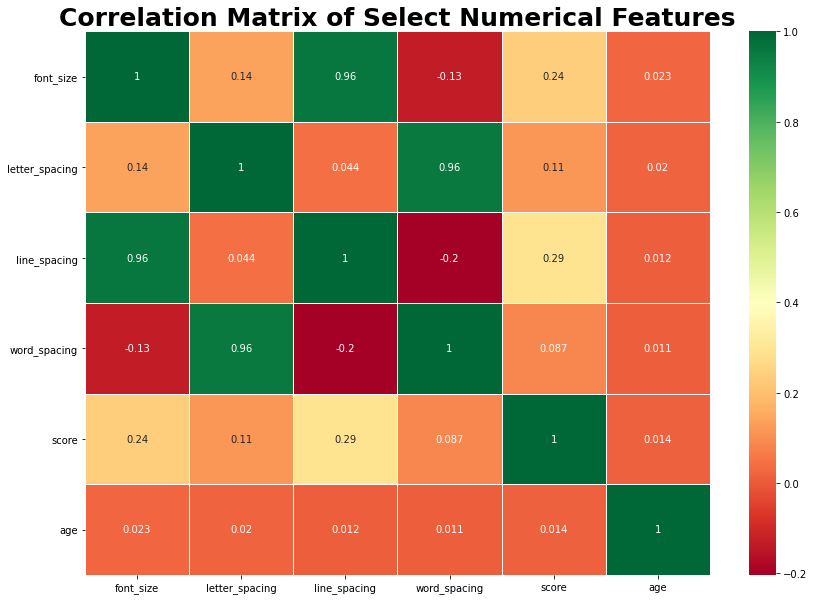

In [25]:
# Calculate the correlation matrix
corr_matrix = df[['font_size', 'letter_spacing', 'line_spacing', 'word_spacing', 'score', 'age']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=.5)

# Show plot with a title
plt.title('Correlation Matrix of Select Numerical Features', fontsize=25, weight='bold')
plt.yticks(rotation=0)
plt.show()

### Explore Test Score Results by Category

In [26]:
df.groupby('wcag_compliant')['score'].mean().sort_values(ascending=False)

wcag_compliant
True     76.162737
False    51.987278
Name: score, dtype: float64

In [27]:
df.groupby('wcag_compliant')['passing_score'].mean().sort_values(ascending=False)

wcag_compliant
True     0.690189
False    0.313609
Name: passing_score, dtype: float64

In [28]:
df.groupby(['disability_id','wcag_compliant'])['score'].mean()

disability_id  wcag_compliant
90000001       False             52.327835
               True              75.784864
90000002       False             55.297600
               True              78.069600
90000003       False             48.135345
               True              74.697135
Name: score, dtype: float64

In [29]:
df.groupby(['disability_id','wcag_compliant'])['passing_score'].mean()

disability_id  wcag_compliant
90000001       False             0.329897
               True              0.677419
90000002       False             0.336000
               True              0.741333
90000003       False             0.275862
               True              0.653646
Name: passing_score, dtype: float64

In [30]:
df.groupby(['disability_id','setting_type'])['score'].mean()

disability_id  setting_type
90000001       90000001A       74.407407
               90000001B       67.434831
               90000001C       81.723158
               90000001D       78.737838
               90000001E       52.327835
90000002       90000002A       75.553906
               90000002B       79.311504
               90000002C       79.425373
               90000002D       55.297600
90000003       90000003A       76.290076
               90000003B       77.275373
               90000003C       70.040336
               90000003D       48.135345
Name: score, dtype: float64

In [31]:
df.groupby(['disability_id','setting_type'])['passing_score'].mean()

disability_id  setting_type
90000001       90000001A       0.611111
               90000001B       0.494382
               90000001C       0.789474
               90000001D       0.792793
               90000001E       0.329897
90000002       90000002A       0.710938
               90000002B       0.769912
               90000002C       0.746269
               90000002D       0.336000
90000003       90000003A       0.648855
               90000003B       0.731343
               90000003C       0.571429
               90000003D       0.275862
Name: passing_score, dtype: float64

In [32]:
groupby_result = df.groupby(['disability_id', 'wcag_compliant'])['score'].mean().reset_index()
groupby_result

,disability_id,wcag_compliant,score
0,90000001,False,52.327835
1,90000001,True,75.784864
2,90000002,False,55.297600
3,90000002,True,78.069600
4,90000003,False,48.135345
5,90000003,True,74.697135


In [33]:
# Calculate the increase in score for each disability_id
score_increase = groupby_result.groupby('disability_id')['score'].diff()

# Create a new DataFrame with 'disability_id' and 'score_increase'
score_increase_df = pd.DataFrame({'disability_id': groupby_result['disability_id'], 'score_increase': score_increase})

# Drop rows with NaN values
score_increase_df.dropna(inplace=True)

# Set 'disability_id' as the index
score_increase_df.set_index('disability_id', inplace=True)

score_increase_df

,score_increase
disability_id,
90000001,23.457028
90000002,22.772000
90000003,26.561791


In [34]:
# Function to reorder a seaborn palette by value
def colors_from_values(values: pd.Series, palette_name:str, ascending=True):
    '''Returns a seaborn palette reordered by value
    Parameters:
    values: pd.Series
    palette_name:str, Seaborn valid palette name
    ascending: bool, optional color sort order
    '''
    # convert to indices
    values = values.sort_values(ascending=ascending).reset_index()
    indices = values.sort_values(by=values.columns[0]).index
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

### Visualizations of Test Score Results by Category

<ipython-input-35-4c5523aaf6a1>:167: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3[0, 0].set_xticklabels(ax3[0, 0].get_xticklabels(), rotation=90)
<ipython-input-35-4c5523aaf6a1>:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3[0, 1].set_xticklabels(ax3[0, 1].get_xticklabels(), rotation=90)


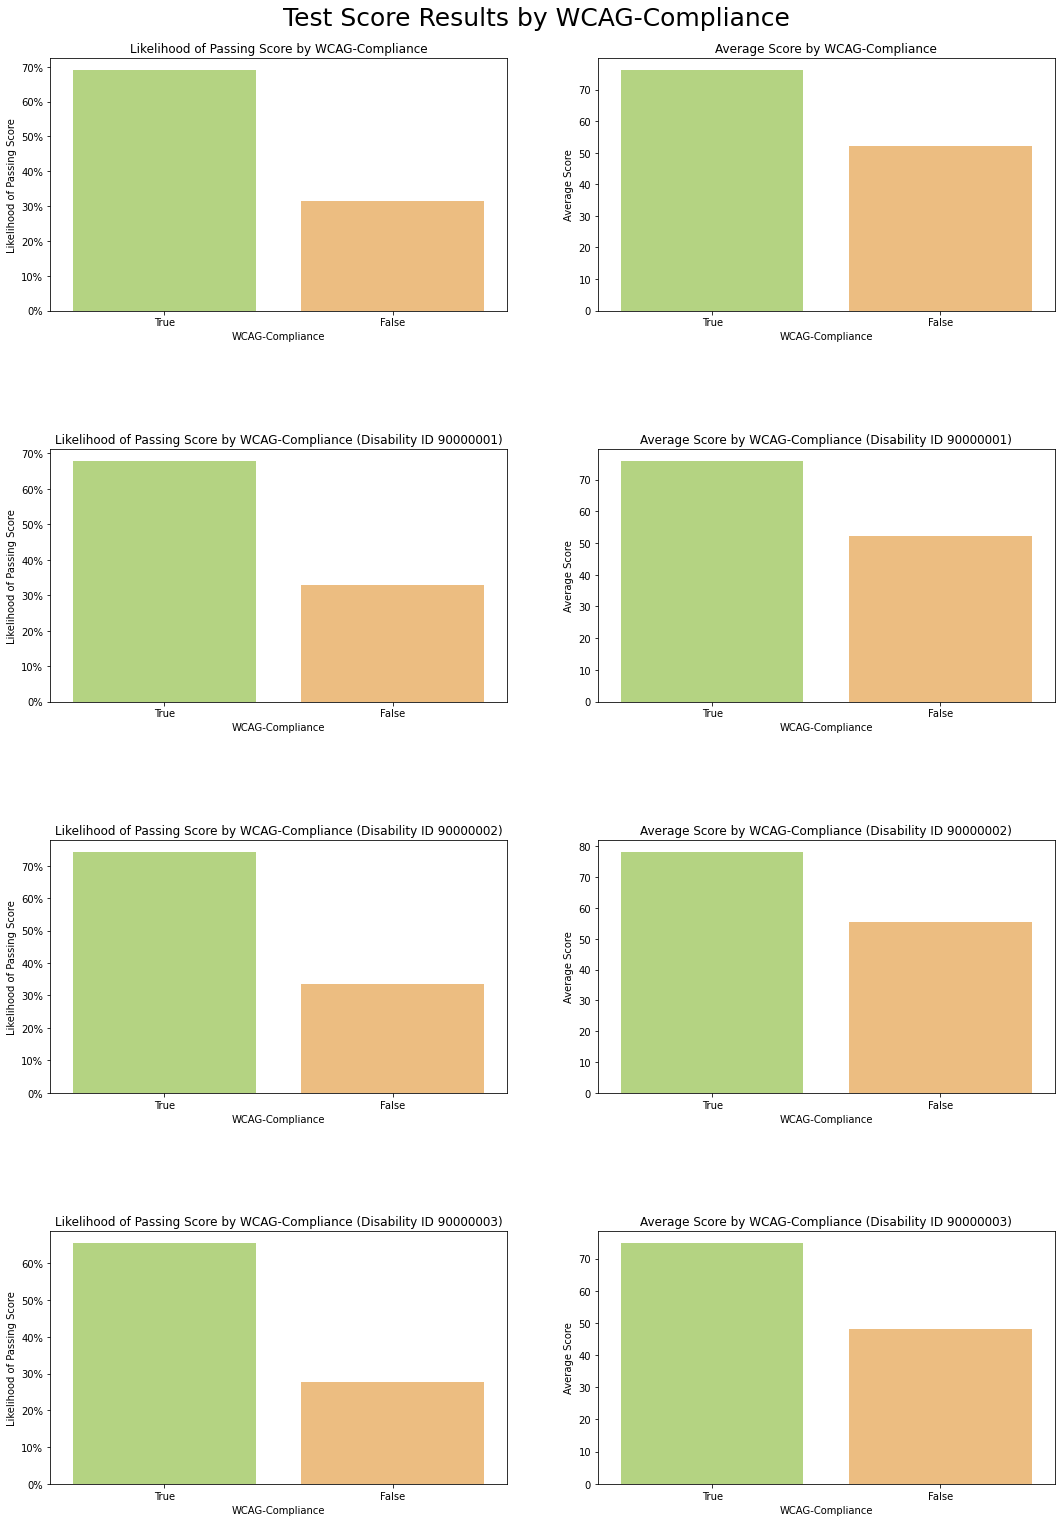

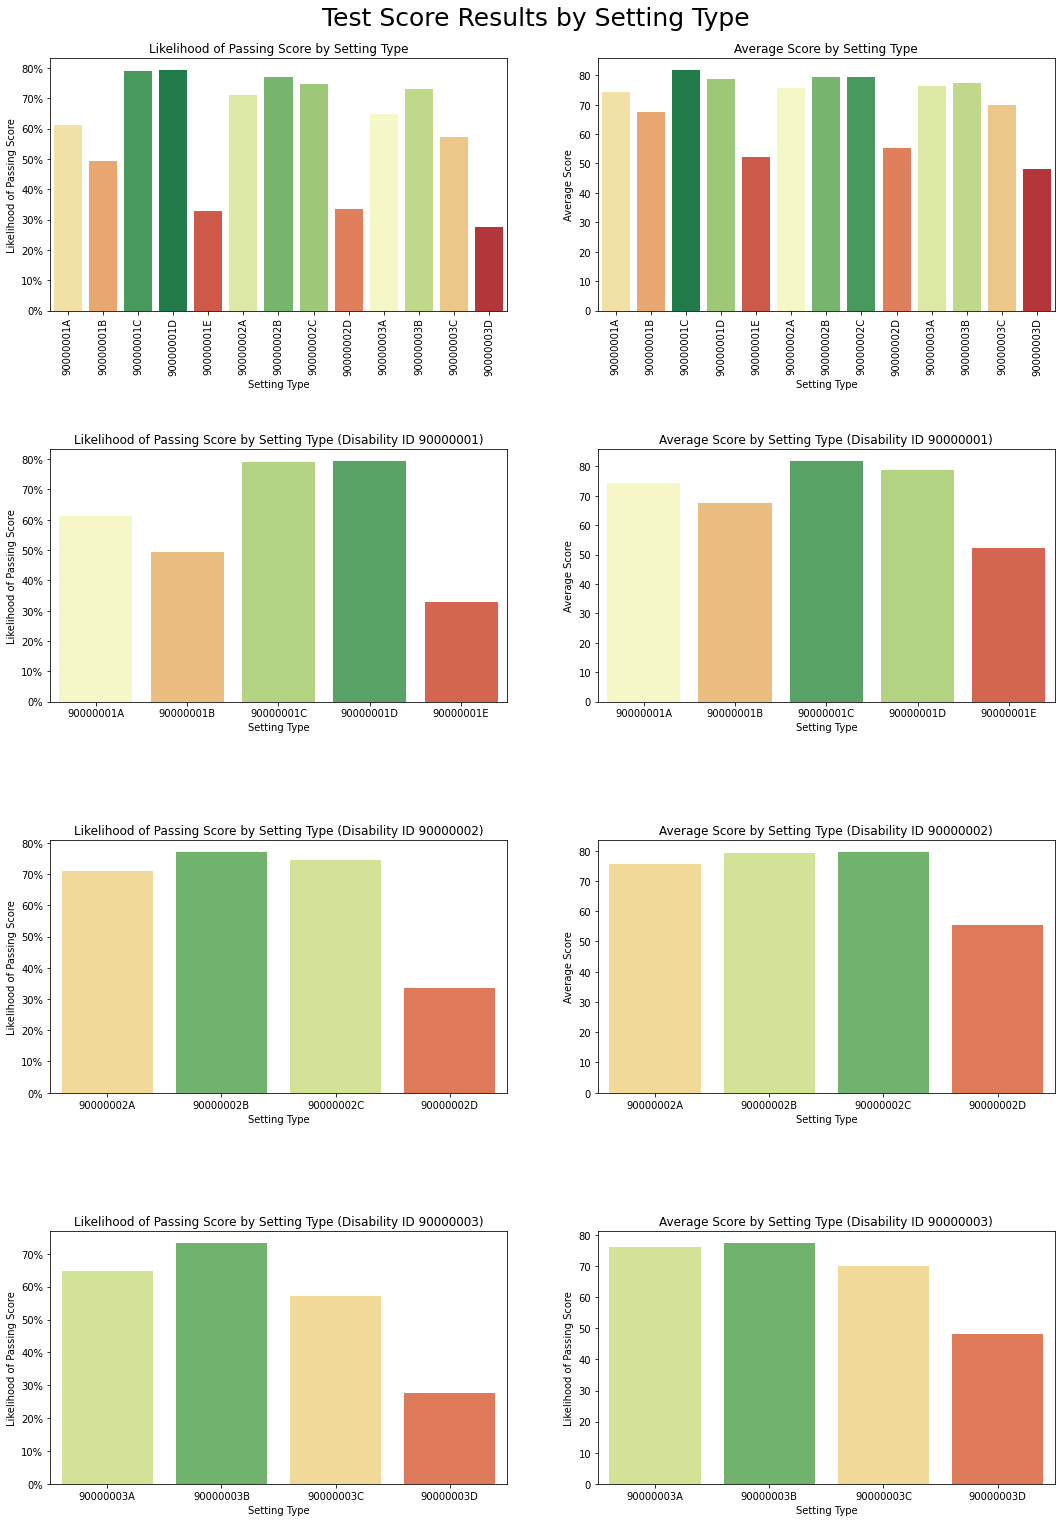

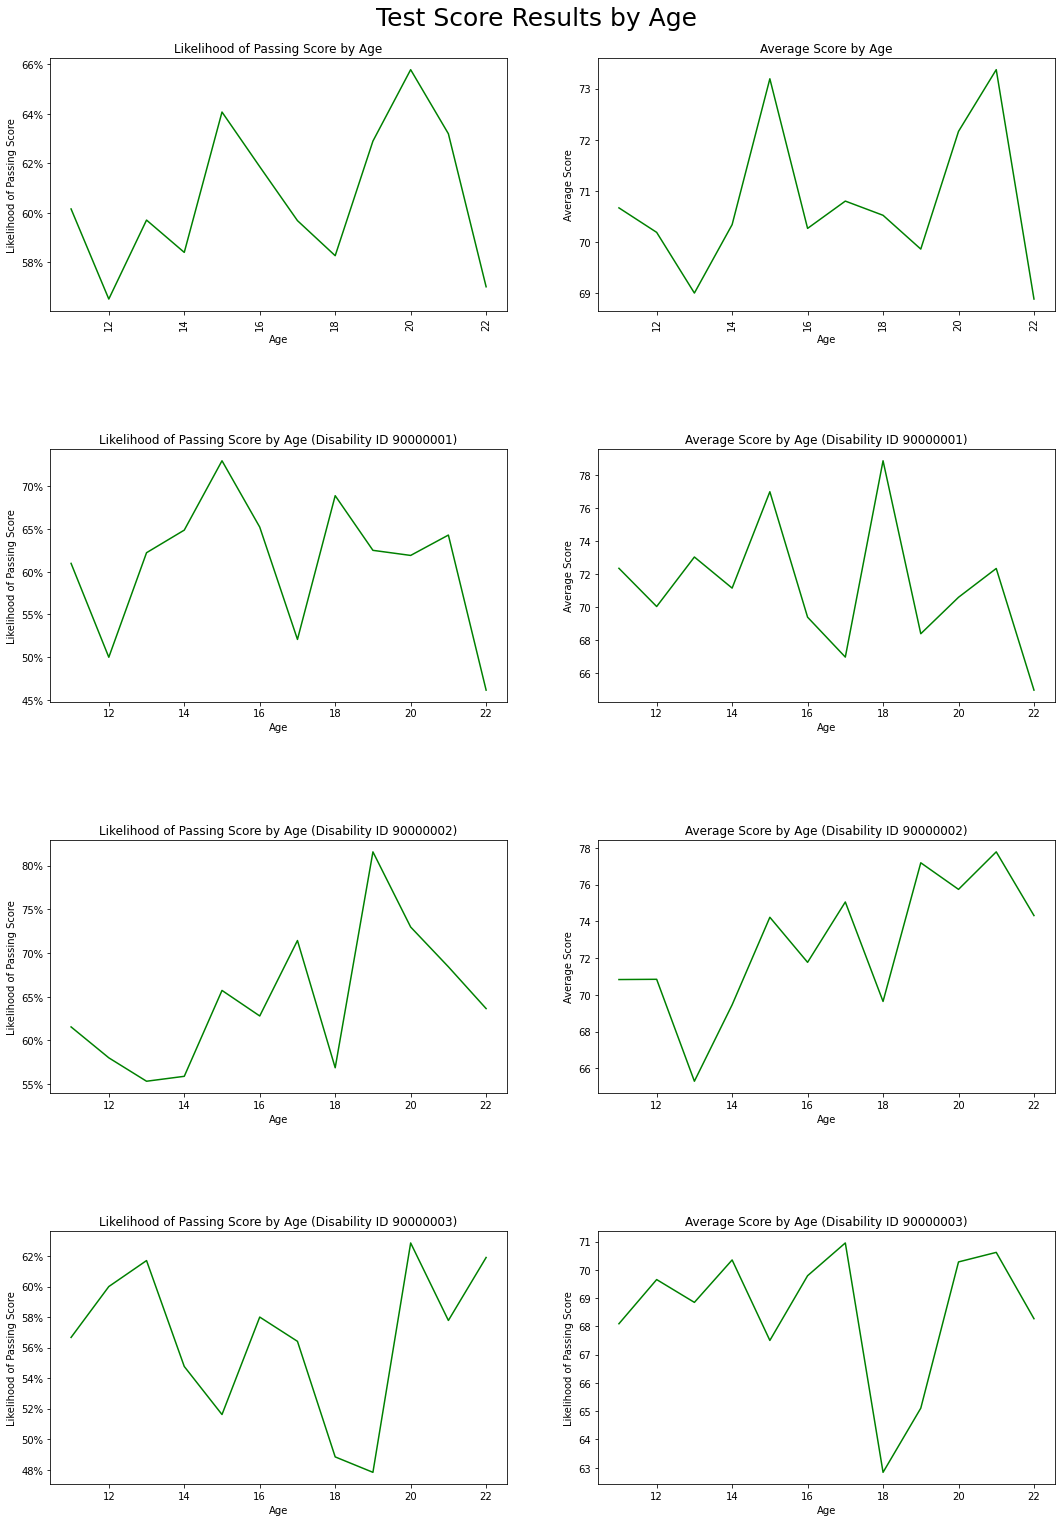

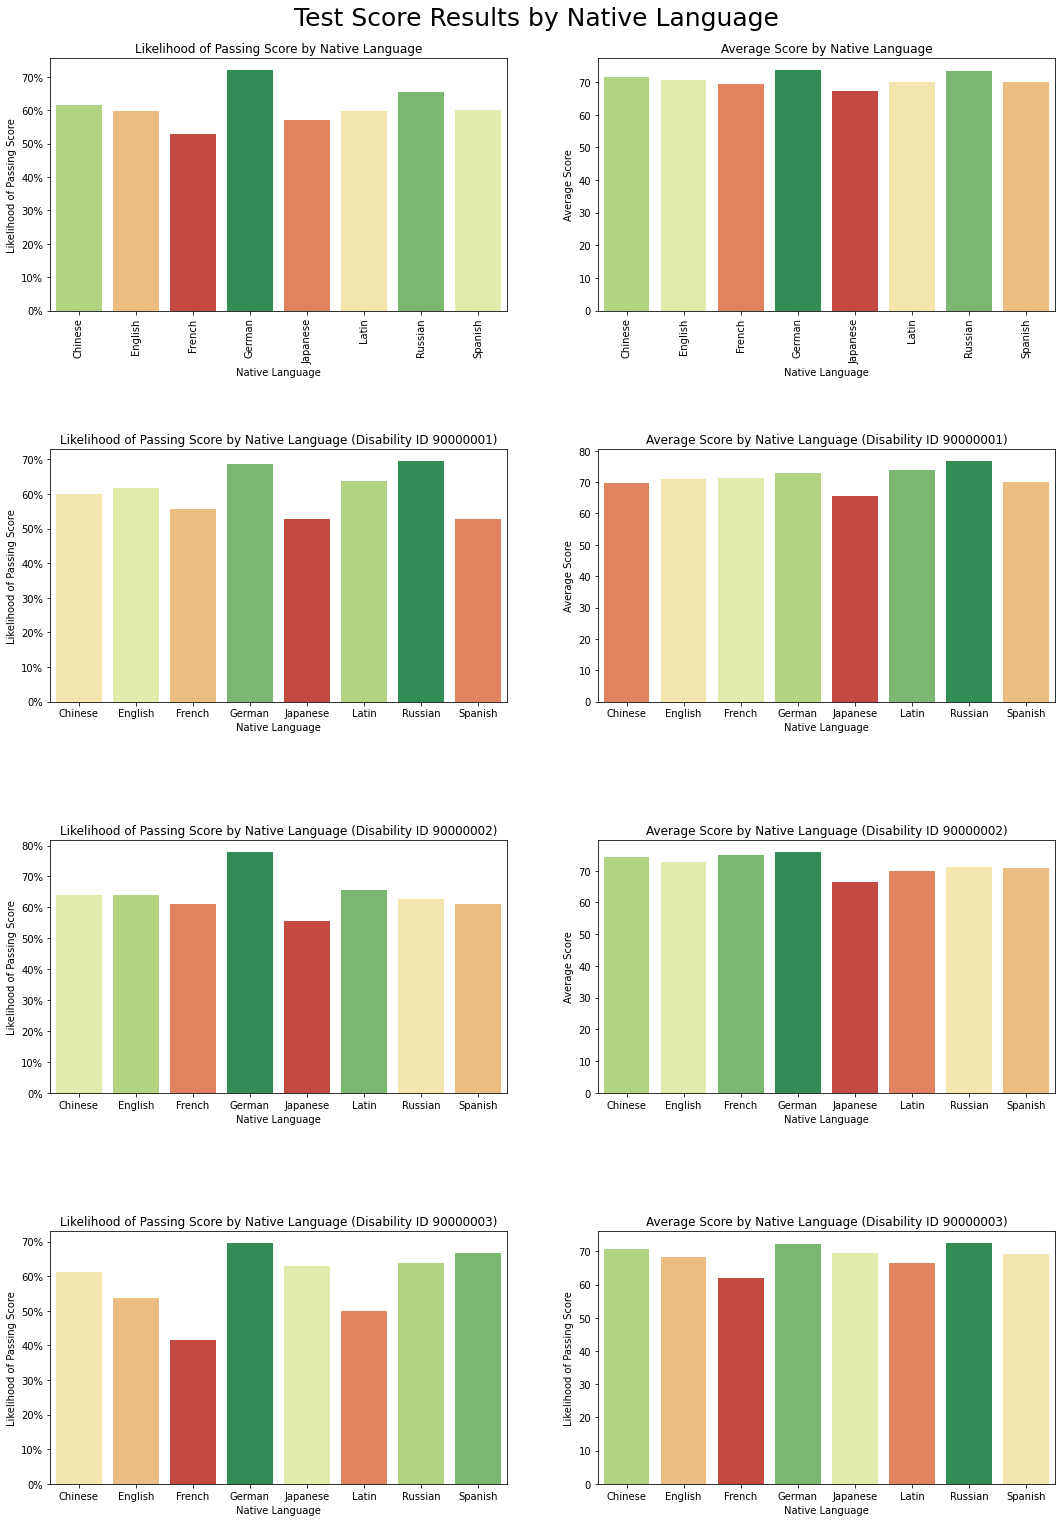

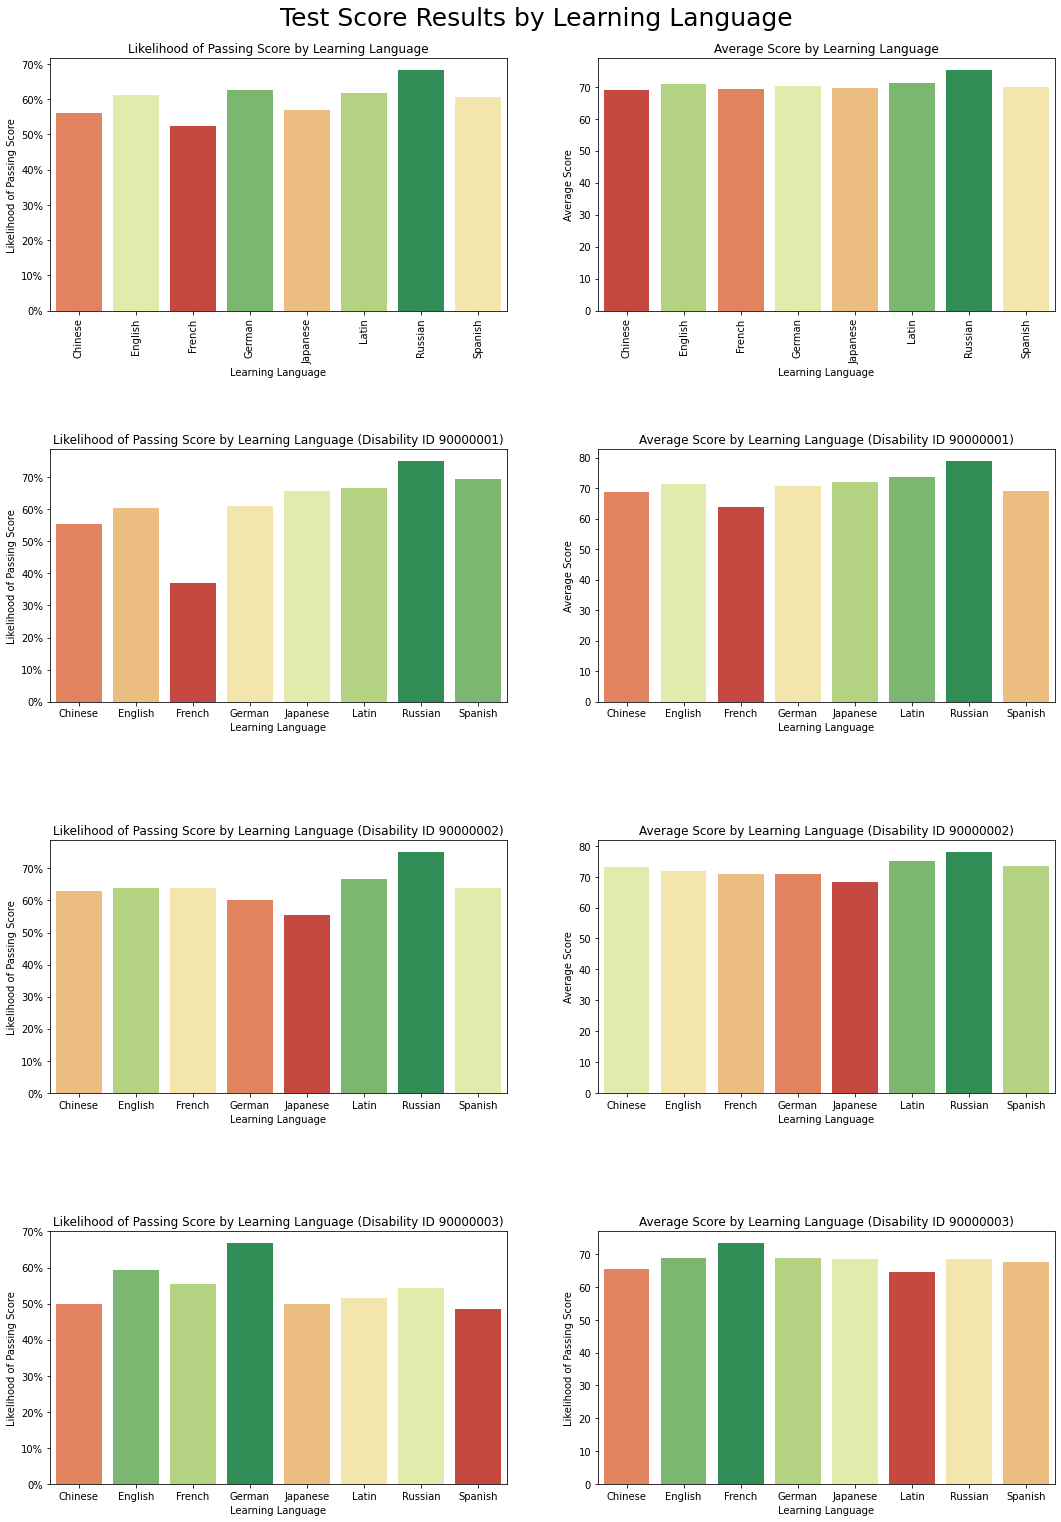

In [35]:
# Visualize test score results for various categories overall and for each disability ID


# Create separate dataframes stratified by disability ID
disability_90000001_df = df[df['disability_id'] == 90000001]
disability_90000002_df = df[df['disability_id'] == 90000002]
disability_90000003_df = df[df['disability_id'] == 90000003]


# Test Score Results by WCAG-Compliance

# WCAG-compliant settings result in a higher likelihood of a passing test score than non-WCAG-compliant settings

# WCAG-compliant settings allow for higher average test scores than non-WCAG-compliant settings

f1, ax1 = plt.subplots(4, 2, figsize =(18, 24))
f1.suptitle('Test Score Results by WCAG-Compliance', fontsize=25)
f1.subplots_adjust(top=0.95, hspace=0.55)

wcag_passing_df = df.groupby('wcag_compliant')['passing_score'].mean()
sorted_wcag_passing = wcag_passing_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='passing_score', data=df, order=sorted_wcag_passing,  ci=None, palette='RdYlGn_r', ax = ax1[0, 0])
ax1[0, 0].set_title('Likelihood of Passing Score by WCAG-Compliance')
ax1[0, 0].set_xlabel('WCAG-Compliance')
ax1[0, 0].set_ylabel('Likelihood of Passing Score')
ax1[0, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

wcag_avg_score_df = df.groupby('wcag_compliant')['score'].mean()
sorted_wcag_avg_score = wcag_avg_score_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='score', data=df, order=sorted_wcag_avg_score,  ci=None, palette='RdYlGn_r', ax = ax1[0, 1])
ax1[0, 1].set_title('Average Score by WCAG-Compliance')
ax1[0, 1].set_xlabel('WCAG-Compliance')
ax1[0, 1].set_ylabel('Average Score')

wcag_passing_90000001_df = disability_90000001_df.groupby('wcag_compliant')['passing_score'].mean()
sorted_wcag_passing_90000001 = wcag_passing_90000001_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='passing_score', data=disability_90000001_df, order=sorted_wcag_passing_90000001,  ci=None, palette='RdYlGn_r', ax = ax1[1, 0])
ax1[1, 0].set_title('Likelihood of Passing Score by WCAG-Compliance (Disability ID 90000001)')
ax1[1, 0].set_xlabel('WCAG-Compliance')
ax1[1, 0].set_ylabel('Likelihood of Passing Score')
ax1[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

wcag_avg_score_90000001_df = disability_90000001_df.groupby('wcag_compliant')['score'].mean()
sorted_wcag_avg_score_90000001 = wcag_avg_score_90000001_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='score', data=disability_90000001_df, order=sorted_wcag_avg_score_90000001,  ci=None, palette='RdYlGn_r', ax = ax1[1, 1])
ax1[1, 1].set_title('Average Score by WCAG-Compliance (Disability ID 90000001)')
ax1[1, 1].set_xlabel('WCAG-Compliance')
ax1[1, 1].set_ylabel('Average Score')

wcag_passing_90000002_df = disability_90000002_df.groupby('wcag_compliant')['passing_score'].mean()
sorted_wcag_passing_90000002 = wcag_passing_90000002_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='passing_score', data=disability_90000002_df, order=sorted_wcag_passing_90000002,  ci=None, palette='RdYlGn_r', ax = ax1[2, 0])
ax1[2, 0].set_title('Likelihood of Passing Score by WCAG-Compliance (Disability ID 90000002)')
ax1[2, 0].set_xlabel('WCAG-Compliance')
ax1[2, 0].set_ylabel('Likelihood of Passing Score')
ax1[2, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

wcag_avg_score_90000002_df = disability_90000002_df.groupby('wcag_compliant')['score'].mean()
sorted_wcag_avg_score_90000002 = wcag_avg_score_90000002_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='score', data=disability_90000002_df, order=sorted_wcag_avg_score_90000002,  ci=None, palette='RdYlGn_r', ax = ax1[2, 1])
ax1[2, 1].set_title('Average Score by WCAG-Compliance (Disability ID 90000002)')
ax1[2, 1].set_xlabel('WCAG-Compliance')
ax1[2, 1].set_ylabel('Average Score')

wcag_passing_90000003_df = disability_90000003_df.groupby('wcag_compliant')['passing_score'].mean()
sorted_wcag_passing_90000003 = wcag_passing_90000003_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='passing_score', data=disability_90000003_df, order=sorted_wcag_passing_90000003,  ci=None, palette='RdYlGn_r', ax = ax1[3, 0])
ax1[3, 0].set_title('Likelihood of Passing Score by WCAG-Compliance (Disability ID 90000003)')
ax1[3, 0].set_xlabel('WCAG-Compliance')
ax1[3, 0].set_ylabel('Likelihood of Passing Score')
ax1[3, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

wcag_avg_score_90000003_df = disability_90000003_df.groupby('wcag_compliant')['score'].mean()
sorted_wcag_avg_score_90000003 = wcag_avg_score_90000003_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='score', data=disability_90000003_df, order=sorted_wcag_avg_score_90000003,  ci=None, palette='RdYlGn_r', ax = ax1[3, 1])
ax1[3, 1].set_title('Average Score by WCAG-Compliance (Disability ID 90000003)')
ax1[3, 1].set_xlabel('WCAG-Compliance')
ax1[3, 1].set_ylabel('Average Score')


# Test Score Results by Setting Type

# WCAG-compliant settings result in a higher likelihood of a passing test score than non-WCAG-compliant settings

# WCAG-compliant settings allow for higher average test scores than non-WCAG-compliant settings

f2, ax2 = plt.subplots(4, 2, figsize =(18, 24))
f2.suptitle('Test Score Results by Setting Type', fontsize=25)
f2.subplots_adjust(top=0.95, hspace=0.55)

setting_passing_df = df.groupby('setting_type')['passing_score'].mean()
order_settings_passing = setting_passing_df.index.sort_values()
sns.barplot(x = setting_passing_df.index, y = setting_passing_df, ci=None, palette=colors_from_values(setting_passing_df, "RdYlGn"), order=order_settings_passing, ax = ax2[0, 0])
ax2[0, 0].set_title('Likelihood of Passing Score by Setting Type')
ax2[0, 0].set_xlabel('Setting Type')
ax2[0, 0].set_ylabel('Likelihood of Passing Score')
ax2[0, 0].set_xticklabels(ax2[0, 0].get_xticklabels(), rotation=90)
ax2[0, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

setting_avg_score_df = df.groupby('setting_type')['score'].mean()
order_settings_avg_score = setting_avg_score_df.index.sort_values()
sns.barplot(x = setting_avg_score_df.index, y = setting_avg_score_df, ci=None, palette=colors_from_values(setting_avg_score_df, "RdYlGn"), order=order_settings_avg_score, ax = ax2[0, 1])
ax2[0, 1].set_title('Average Score by Setting Type')
ax2[0, 1].set_xlabel('Setting Type')
ax2[0, 1].set_ylabel('Average Score')
ax2[0, 1].set_xticklabels(ax2[0, 1].get_xticklabels(), rotation=90)

setting_passing_90000001_df = disability_90000001_df.groupby('setting_type')['passing_score'].mean()
order_settings_passing_90000001 = setting_passing_90000001_df.index.sort_values()
sns.barplot(x = setting_passing_90000001_df.index, y = setting_passing_90000001_df, ci=None, palette=colors_from_values(setting_passing_90000001_df, "RdYlGn"), order=order_settings_passing_90000001, ax = ax2[1, 0])
ax2[1, 0].set_title('Likelihood of Passing Score by Setting Type (Disability ID 90000001)')
ax2[1, 0].set_xlabel('Setting Type')
ax2[1, 0].set_ylabel('Likelihood of Passing Score')
ax2[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

setting_avg_score_90000001_df = disability_90000001_df.groupby('setting_type')['score'].mean()
order_settings_avg_score_90000001 = setting_avg_score_90000001_df.index.sort_values()
sns.barplot(x = setting_avg_score_90000001_df.index, y = setting_avg_score_90000001_df, ci=None, palette=colors_from_values(setting_avg_score_90000001_df, "RdYlGn"), order=order_settings_avg_score_90000001, ax = ax2[1, 1])
ax2[1, 1].set_title('Average Score by Setting Type (Disability ID 90000001)')
ax2[1, 1].set_xlabel('Setting Type')
ax2[1, 1].set_ylabel('Average Score')

setting_passing_90000002_df = disability_90000002_df.groupby('setting_type')['passing_score'].mean()
order_settings_passing_90000002 = setting_passing_90000002_df.index.sort_values()
sns.barplot(x = setting_passing_90000002_df.index, y = setting_passing_90000002_df, ci=None, palette=colors_from_values(setting_passing_90000002_df, "RdYlGn"), order=order_settings_passing_90000002, ax = ax2[2, 0])
ax2[2, 0].set_title('Likelihood of Passing Score by Setting Type (Disability ID 90000002)')
ax2[2, 0].set_xlabel('Setting Type')
ax2[2, 0].set_ylabel('Likelihood of Passing Score')
ax2[2, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

setting_avg_score_90000002_df = disability_90000002_df.groupby('setting_type')['score'].mean()
order_settings_avg_score_90000002 = setting_avg_score_90000002_df.index.sort_values()
sns.barplot(x = setting_avg_score_90000002_df.index, y = setting_avg_score_90000002_df, ci=None, palette=colors_from_values(setting_avg_score_90000002_df, "RdYlGn"), order=order_settings_avg_score_90000002, ax = ax2[2, 1])
ax2[2, 1].set_title('Average Score by Setting Type (Disability ID 90000002)')
ax2[2, 1].set_xlabel('Setting Type')
ax2[2, 1].set_ylabel('Average Score')

setting_passing_90000003_df = disability_90000003_df.groupby('setting_type')['passing_score'].mean()
order_settings_passing_90000003 = setting_passing_90000003_df.index.sort_values()
sns.barplot(x = setting_passing_90000003_df.index, y = setting_passing_90000003_df, ci=None, palette=colors_from_values(setting_passing_90000003_df, "RdYlGn"), order=order_settings_passing_90000003, ax = ax2[3, 0])
ax2[3, 0].set_title('Likelihood of Passing Score by Setting Type (Disability ID 90000003)')
ax2[3, 0].set_xlabel('Setting Type')
ax2[3, 0].set_ylabel('Likelihood of Passing Score')
ax2[3, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

setting_avg_score_90000003_df = disability_90000003_df.groupby('setting_type')['score'].mean()
order_settings_avg_score_90000003 = setting_avg_score_90000003_df.index.sort_values()
sns.barplot(x = setting_avg_score_90000003_df.index, y = setting_avg_score_90000003_df, ci=None, palette=colors_from_values(setting_avg_score_90000003_df, "RdYlGn"), order=order_settings_avg_score_90000003, ax = ax2[3, 1])
ax2[3, 1].set_title('Average Score by Setting Type (Disability ID 90000003)')
ax2[3, 1].set_xlabel('Setting Type')
ax2[3, 1].set_ylabel('Likelihood of Passing Score')


# Test Score Results by Age

# No clear patterns are evident by age

f3, ax3 = plt.subplots(4, 2, figsize =(18, 24))
f3.suptitle('Test Score Results by Age', fontsize=25)
f3.subplots_adjust(top=0.95, hspace=0.55)

age_passing_df = df.groupby('age')['passing_score'].mean()
sns.lineplot(x = age_passing_df.index, y = age_passing_df, color = "green", ax = ax3[0, 0])
ax3[0, 0].set_title('Likelihood of Passing Score by Age')
ax3[0, 0].set_xlabel('Age')
ax3[0, 0].set_ylabel('Likelihood of Passing Score')
ax3[0, 0].set_xticklabels(ax3[0, 0].get_xticklabels(), rotation=90)
ax3[0, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

age_avg_score_df = df.groupby('age')['score'].mean()
sns.lineplot(x = age_avg_score_df.index, y = age_avg_score_df, color = "green", ax = ax3[0, 1])
ax3[0, 1].set_title('Average Score by Age')
ax3[0, 1].set_xlabel('Age')
ax3[0, 1].set_ylabel('Average Score')
ax3[0, 1].set_xticklabels(ax3[0, 1].get_xticklabels(), rotation=90)

age_passing_90000001_df = disability_90000001_df.groupby('age')['passing_score'].mean()
sns.lineplot(x = age_passing_90000001_df.index, y = age_passing_90000001_df, color = "green", ax = ax3[1, 0])
ax3[1, 0].set_title('Likelihood of Passing Score by Age (Disability ID 90000001)')
ax3[1, 0].set_xlabel('Age')
ax3[1, 0].set_ylabel('Likelihood of Passing Score')
ax3[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

age_avg_score_90000001_df = disability_90000001_df.groupby('age')['score'].mean()
sns.lineplot(x = age_avg_score_90000001_df.index, y = age_avg_score_90000001_df, color = "green", ax = ax3[1, 1])
ax3[1, 1].set_title('Average Score by Age (Disability ID 90000001)')
ax3[1, 1].set_xlabel('Age')
ax3[1, 1].set_ylabel('Average Score')

age_passing_90000002_df = disability_90000002_df.groupby('age')['passing_score'].mean()
sns.lineplot(x = age_passing_90000002_df.index, y = age_passing_90000002_df, color = "green", ax = ax3[2, 0])
ax3[2, 0].set_title('Likelihood of Passing Score by Age (Disability ID 90000002)')
ax3[2, 0].set_xlabel('Age')
ax3[2, 0].set_ylabel('Likelihood of Passing Score')
ax3[2, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

age_avg_score_90000002_df = disability_90000002_df.groupby('age')['score'].mean()
sns.lineplot(x = age_avg_score_90000002_df.index, y = age_avg_score_90000002_df, color = "green", ax = ax3[2, 1])
ax3[2, 1].set_title('Average Score by Age (Disability ID 90000002)')
ax3[2, 1].set_xlabel('Age')
ax3[2, 1].set_ylabel('Average Score')

age_passing_90000003_df = disability_90000003_df.groupby('age')['passing_score'].mean()
sns.lineplot(x = age_passing_90000003_df.index, y = age_passing_90000003_df, color = "green", ax = ax3[3, 0])
ax3[3, 0].set_title('Likelihood of Passing Score by Age (Disability ID 90000003)')
ax3[3, 0].set_xlabel('Age')
ax3[3, 0].set_ylabel('Likelihood of Passing Score')
ax3[3, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

age_avg_score_90000003_df = disability_90000003_df.groupby('age')['score'].mean()
sns.lineplot(x = age_avg_score_90000003_df.index, y = age_avg_score_90000003_df, color = "green", ax = ax3[3, 1])
ax3[3, 1].set_title('Average Score by Age (Disability ID 90000003)')
ax3[3, 1].set_xlabel('Age')
ax3[3, 1].set_ylabel('Likelihood of Passing Score')


# Test Score Results by Native Language

# No clear patterns are evident by native language

f4, ax4 = plt.subplots(4, 2, figsize =(18, 24))
f4.suptitle('Test Score Results by Native Language', fontsize=25)
f4.subplots_adjust(top=0.95, hspace=0.55)

native_language_passing_df = df.groupby('native_language')['passing_score'].mean()
order_native_language_passing = native_language_passing_df.index.sort_values()
sns.barplot(x = native_language_passing_df.index, y = native_language_passing_df, ci=None, palette=colors_from_values(native_language_passing_df, "RdYlGn"), order=order_native_language_passing, ax = ax4[0, 0])
ax4[0, 0].set_title('Likelihood of Passing Score by Native Language')
ax4[0, 0].set_xlabel('Native Language')
ax4[0, 0].set_ylabel('Likelihood of Passing Score')
ax4[0, 0].set_xticklabels(ax4[0, 0].get_xticklabels(), rotation=90)
ax4[0, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

native_language_avg_score_df = df.groupby('native_language')['score'].mean()
order_native_language_avg_score = native_language_avg_score_df.index.sort_values()
sns.barplot(x = native_language_avg_score_df.index, y = native_language_avg_score_df, ci=None, palette=colors_from_values(native_language_avg_score_df, "RdYlGn"), order=order_native_language_avg_score, ax = ax4[0, 1])
ax4[0, 1].set_title('Average Score by Native Language')
ax4[0, 1].set_xlabel('Native Language')
ax4[0, 1].set_ylabel('Average Score')
ax4[0, 1].set_xticklabels(ax4[0, 1].get_xticklabels(), rotation=90)

native_language_passing_90000001_df = disability_90000001_df.groupby('native_language')['passing_score'].mean()
order_native_language_passing_90000001 = native_language_passing_90000001_df.index.sort_values()
sns.barplot(x = native_language_passing_90000001_df.index, y = native_language_passing_90000001_df, ci=None, palette=colors_from_values(native_language_passing_90000001_df, "RdYlGn"), order=order_native_language_passing_90000001, ax = ax4[1, 0])
ax4[1, 0].set_title('Likelihood of Passing Score by Native Language (Disability ID 90000001)')
ax4[1, 0].set_xlabel('Native Language')
ax4[1, 0].set_ylabel('Likelihood of Passing Score')
ax4[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

native_language_avg_score_90000001_df = disability_90000001_df.groupby('native_language')['score'].mean()
order_native_language_avg_score_90000001 = native_language_avg_score_90000001_df.index.sort_values()
sns.barplot(x = native_language_avg_score_90000001_df.index, y = native_language_avg_score_90000001_df, ci=None, palette=colors_from_values(native_language_avg_score_90000001_df, "RdYlGn"), order=order_native_language_avg_score_90000001, ax = ax4[1, 1])
ax4[1, 1].set_title('Average Score by Native Language (Disability ID 90000001)')
ax4[1, 1].set_xlabel('Native Language')
ax4[1, 1].set_ylabel('Average Score')

native_language_passing_90000002_df = disability_90000002_df.groupby('native_language')['passing_score'].mean()
order_native_language_passing_90000002 = native_language_passing_90000002_df.index.sort_values()
sns.barplot(x = native_language_passing_90000002_df.index, y = native_language_passing_90000002_df, ci=None, palette=colors_from_values(native_language_passing_90000002_df, "RdYlGn"), order=order_native_language_passing_90000002, ax = ax4[2, 0])
ax4[2, 0].set_title('Likelihood of Passing Score by Native Language (Disability ID 90000002)')
ax4[2, 0].set_xlabel('Native Language')
ax4[2, 0].set_ylabel('Likelihood of Passing Score')
ax4[2, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

native_language_avg_score_90000002_df = disability_90000002_df.groupby('native_language')['score'].mean()
order_native_language_avg_score_90000002 = native_language_avg_score_90000002_df.index.sort_values()
sns.barplot(x = native_language_avg_score_90000002_df.index, y = native_language_avg_score_90000002_df, ci=None, palette=colors_from_values(native_language_avg_score_90000002_df, "RdYlGn"), order=order_native_language_avg_score_90000002, ax = ax4[2, 1])
ax4[2, 1].set_title('Average Score by Native Language (Disability ID 90000002)')
ax4[2, 1].set_xlabel('Native Language')
ax4[2, 1].set_ylabel('Average Score')

native_language_passing_90000003_df = disability_90000003_df.groupby('native_language')['passing_score'].mean()
order_native_language_passing_90000003 = native_language_passing_90000003_df.index.sort_values()
sns.barplot(x = native_language_passing_90000003_df.index, y = native_language_passing_90000003_df, ci=None, palette=colors_from_values(native_language_passing_90000003_df, "RdYlGn"), order=order_native_language_passing_90000003, ax = ax4[3, 0])
ax4[3, 0].set_title('Likelihood of Passing Score by Native Language (Disability ID 90000003)')
ax4[3, 0].set_xlabel('Native Language')
ax4[3, 0].set_ylabel('Likelihood of Passing Score')
ax4[3, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

native_language_avg_score_90000003_df = disability_90000003_df.groupby('native_language')['score'].mean()
order_native_language_avg_score_90000003 = native_language_avg_score_90000003_df.index.sort_values()
sns.barplot(x = native_language_avg_score_90000003_df.index, y = native_language_avg_score_90000003_df, ci=None, palette=colors_from_values(native_language_avg_score_90000003_df, "RdYlGn"), order=order_native_language_avg_score_90000003, ax = ax4[3, 1])
ax4[3, 1].set_title('Average Score by Native Language (Disability ID 90000003)')
ax4[3, 1].set_xlabel('Native Language')
ax4[3, 1].set_ylabel('Likelihood of Passing Score')


# Test Score Results by Learning Language

# No clear patterns are evident by learning language

f5, ax5 = plt.subplots(4, 2, figsize =(18, 24))
f5.suptitle('Test Score Results by Learning Language', fontsize=25)
f5.subplots_adjust(top=0.95, hspace=0.55)

learning_language_passing_df = df.groupby('learning_language')['passing_score'].mean()
order_learning_language_passing = learning_language_passing_df.index.sort_values()
sns.barplot(x = learning_language_passing_df.index, y = learning_language_passing_df, ci=None, palette=colors_from_values(learning_language_passing_df, "RdYlGn"), order=order_learning_language_passing, ax = ax5[0, 0])
ax5[0, 0].set_title('Likelihood of Passing Score by Learning Language')
ax5[0, 0].set_xlabel('Learning Language')
ax5[0, 0].set_ylabel('Likelihood of Passing Score')
ax5[0, 0].set_xticklabels(ax5[0, 0].get_xticklabels(), rotation=90)
ax5[0, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

learning_language_avg_score_df = df.groupby('learning_language')['score'].mean()
order_learning_language_avg_score = learning_language_avg_score_df.index.sort_values()
sns.barplot(x = learning_language_avg_score_df.index, y = learning_language_avg_score_df, ci=None, palette=colors_from_values(learning_language_avg_score_df, "RdYlGn"), order=order_learning_language_avg_score, ax = ax5[0, 1])
ax5[0, 1].set_title('Average Score by Learning Language')
ax5[0, 1].set_xlabel('Learning Language')
ax5[0, 1].set_ylabel('Average Score')
ax5[0, 1].set_xticklabels(ax5[0, 1].get_xticklabels(), rotation=90)

learning_language_passing_90000001_df = disability_90000001_df.groupby('learning_language')['passing_score'].mean()
order_learning_language_passing_90000001 = learning_language_passing_90000001_df.index.sort_values()
sns.barplot(x = learning_language_passing_90000001_df.index, y = learning_language_passing_90000001_df, ci=None, palette=colors_from_values(learning_language_passing_90000001_df, "RdYlGn"), order=order_learning_language_passing_90000001, ax = ax5[1, 0])
ax5[1, 0].set_title('Likelihood of Passing Score by Learning Language (Disability ID 90000001)')
ax5[1, 0].set_xlabel('Learning Language')
ax5[1, 0].set_ylabel('Likelihood of Passing Score')
ax5[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

learning_language_avg_score_90000001_df = disability_90000001_df.groupby('learning_language')['score'].mean()
order_learning_language_avg_score_90000001 = learning_language_avg_score_90000001_df.index.sort_values()
sns.barplot(x = learning_language_avg_score_90000001_df.index, y = learning_language_avg_score_90000001_df, ci=None, palette=colors_from_values(learning_language_avg_score_90000001_df, "RdYlGn"), order=order_learning_language_avg_score_90000001, ax = ax5[1, 1])
ax5[1, 1].set_title('Average Score by Learning Language (Disability ID 90000001)')
ax5[1, 1].set_xlabel('Learning Language')
ax5[1, 1].set_ylabel('Average Score')

learning_language_passing_90000002_df = disability_90000002_df.groupby('learning_language')['passing_score'].mean()
order_learning_language_passing_90000002 = learning_language_passing_90000002_df.index.sort_values()
sns.barplot(x = learning_language_passing_90000002_df.index, y = learning_language_passing_90000002_df, ci=None, palette=colors_from_values(learning_language_passing_90000002_df, "RdYlGn"), order=order_learning_language_passing_90000002, ax = ax5[2, 0])
ax5[2, 0].set_title('Likelihood of Passing Score by Learning Language (Disability ID 90000002)')
ax5[2, 0].set_xlabel('Learning Language')
ax5[2, 0].set_ylabel('Likelihood of Passing Score')
ax5[2, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

learning_language_avg_score_90000002_df = disability_90000002_df.groupby('learning_language')['score'].mean()
order_learning_language_avg_score_90000002 = learning_language_avg_score_90000002_df.index.sort_values()
sns.barplot(x = learning_language_avg_score_90000002_df.index, y = learning_language_avg_score_90000002_df, ci=None, palette=colors_from_values(learning_language_avg_score_90000002_df, "RdYlGn"), order=order_learning_language_avg_score_90000002, ax = ax5[2, 1])
ax5[2, 1].set_title('Average Score by Learning Language (Disability ID 90000002)')
ax5[2, 1].set_xlabel('Learning Language')
ax5[2, 1].set_ylabel('Average Score')

learning_language_passing_90000003_df = disability_90000003_df.groupby('learning_language')['passing_score'].mean()
order_learning_language_passing_90000003 = learning_language_passing_90000003_df.index.sort_values()
sns.barplot(x = learning_language_passing_90000003_df.index, y = learning_language_passing_90000003_df, ci=None, palette=colors_from_values(learning_language_passing_90000003_df, "RdYlGn"), order=order_learning_language_passing_90000003, ax = ax5[3, 0])
ax5[3, 0].set_title('Likelihood of Passing Score by Learning Language (Disability ID 90000003)')
ax5[3, 0].set_xlabel('Learning Language')
ax5[3, 0].set_ylabel('Likelihood of Passing Score')
ax5[3, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

learning_language_avg_score_90000003_df = disability_90000003_df.groupby('learning_language')['score'].mean()
order_learning_language_avg_score_90000003 = learning_language_avg_score_90000003_df.index.sort_values()
sns.barplot(x = learning_language_avg_score_90000003_df.index, y = learning_language_avg_score_90000003_df, ci=None, palette=colors_from_values(learning_language_avg_score_90000003_df, "RdYlGn"), order=order_learning_language_avg_score_90000003, ax = ax5[3, 1])
ax5[3, 1].set_title('Average Score by Learning Language (Disability ID 90000003)')
ax5[3, 1].set_xlabel('Learning Language')
ax5[3, 1].set_ylabel('Likelihood of Passing Score')


# Show the plots
plt.show()

After reviewing visuals, it is apparent that the highest predictor of both a passing test score and higher average test scores is WCAG-compliance, specifically:

- WCAG-compliant settings result in a higher likelihood of a passing test score than non-WCAG-compliant settings

- WCAG-compliant settings allow for higher average test scores than non-WCAG-compliant settings

I found no clear patterns where age, the native language or the learning language affect either the likelihood of a passing test score or the average test score.

### More Data Preparation

#### Drop columns not needed for modeling

In [36]:
df.drop(['user_id', 'first_name', 'last_name', 'username', 'date_of_birth', 'native_language', 'learning_language', 'created_at','setting_id','age', 'profile_photo'], axis = 1, inplace = True)

In [37]:
# df.info()

#### Check for multicollinearity and drop columns as needed

In [38]:
df_nums = df.select_dtypes('number').drop(columns=['disability_id'])
df_nums.corr()

,font_size,letter_spacing,line_spacing,word_spacing,score
font_size,1.000000,0.136968,0.958048,-0.132441,0.236179
letter_spacing,0.136968,1.000000,0.044190,0.956905,0.112940
line_spacing,0.958048,0.044190,1.000000,-0.203188,0.292123
word_spacing,-0.132441,0.956905,-0.203188,1.000000,0.086568
score,0.236179,0.112940,0.292123,0.086568,1.000000


In [39]:
df.drop(['line_spacing', 'letter_spacing'], axis = 1, inplace = True)

Font size and line spacing are highly correlated. That is because the optimal line spacing according to WCAG guidelines is 1.5 times or 150% of the font size. I will keep **font_size** and drop **line_spacing**.

Similarly, word spacing and letter spacing are highly correlated. WCAG guidelines suggest that letter spacing should be 35% more than average letter width (based on font). They also suggest that word spacing should be 3.5 times more than the line spacing. Since I am dropping **line_spacing**, it should be okay to keep **word_spacing**.

In [41]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   disability_id       1500 non-null   int64  
 1   setting_type        1500 non-null   object 
 2   font_color          1500 non-null   object 
 3   background_color    1500 non-null   object 
 4   font_size           1500 non-null   int64  
 5   font_weight         1500 non-null   object 
 6   font_family         1500 non-null   object 
 7   word_spacing        1500 non-null   float64
 8   text_alignment      1500 non-null   object 
 9   is_auto_play_tts    1500 non-null   bool   
 10  bionic_reading      1500 non-null   object 
 11  lists with bullets  1500 non-null   object 
 12  wcag_compliant      1500 non-null   bool   
 13  score               1500 non-null   float64
 14  passing_score       1500 non-null   bool   
dtypes: bool(3), float64(2), int64(2), object(8)
memory usag

## Models